# Import libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os

% matplotlib inline

eV = 1.6e-19

# plot electron dispersion in $K_2$-extended representation

dimensions are n_c: 2, n_k: 9100, n_mu: 1


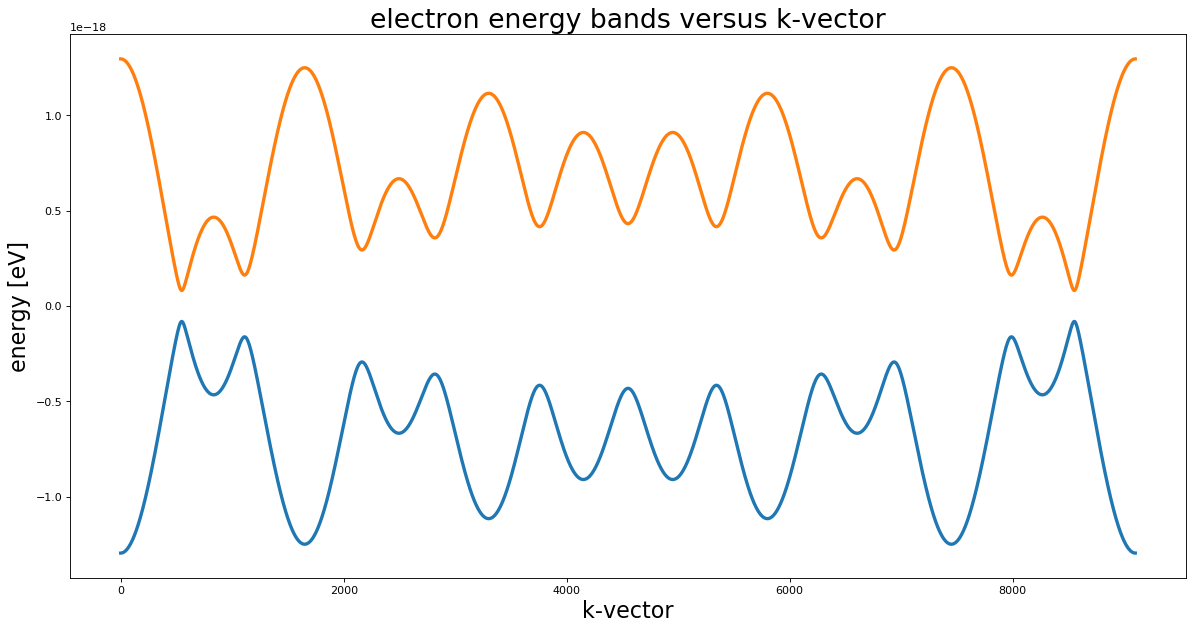

In [37]:
directory = "/Users/amirhossein/research/exciton_energy"
filename = os.path.join(directory,"cnt1.K2_extended.el_energy.dat")
with open(filename, mode='r') as f:            
    line = f.readline()
    line = f.readline() # second line contains the shape of the cube
    dims = list(map(int, line.split()))
    
    data = np.loadtxt(f)
    
    print("dimensions are n_c: {}, n_k: {}, n_mu: {}".format(dims[0], dims[1], dims[2]))
    
    assert dims[0]*dims[2] is data.shape[0]
    el_energy_reduced = np.empty(dims)
    for k in range(dims[2]):
        el_energy_reduced [:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]
    
    fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(dims[0]):
        for k in range(dims[2]):
            plt.plot(el_energy_reduced[i,:,k], linewidth=3)

    plt.title('electron energy bands versus k-vector', size=24)
    plt.xlabel('k-vector', size=20)
    plt.ylabel('energy [eV]', size=20)
        

# Plot real and imaginary parts of $v_{b,b'}(q)$

dimensions are [18199, 1, 4]
(18199, 1, 4)
dimensions are [18199, 1, 4]


Text(0,0.5,'energy [eV]')

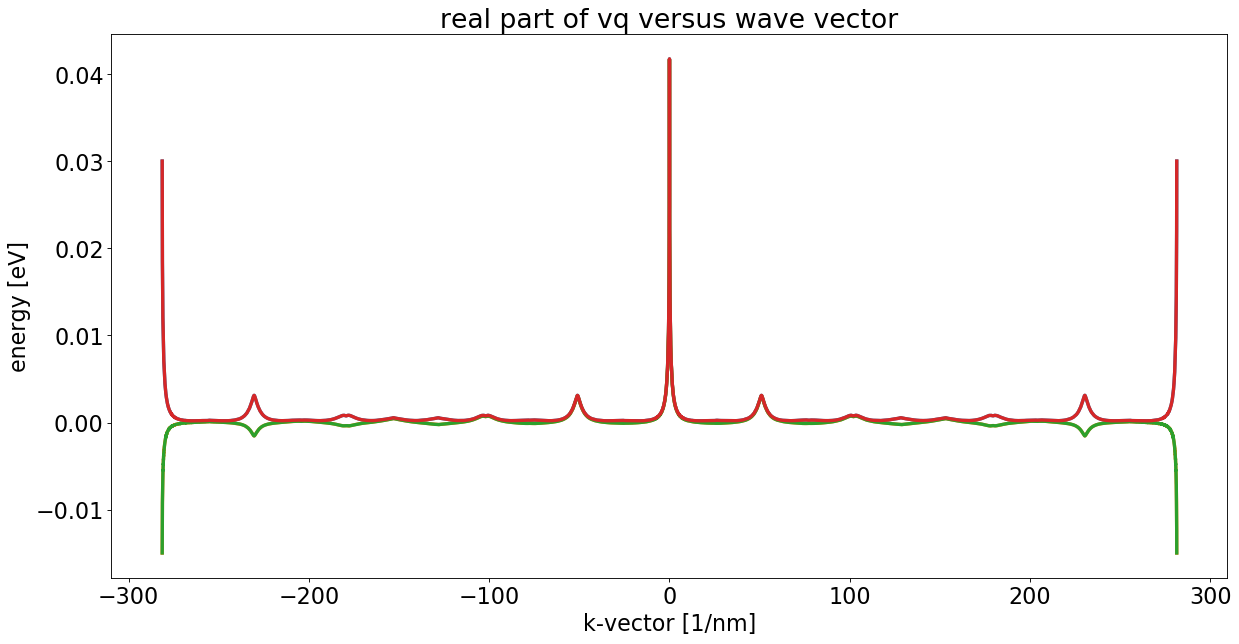

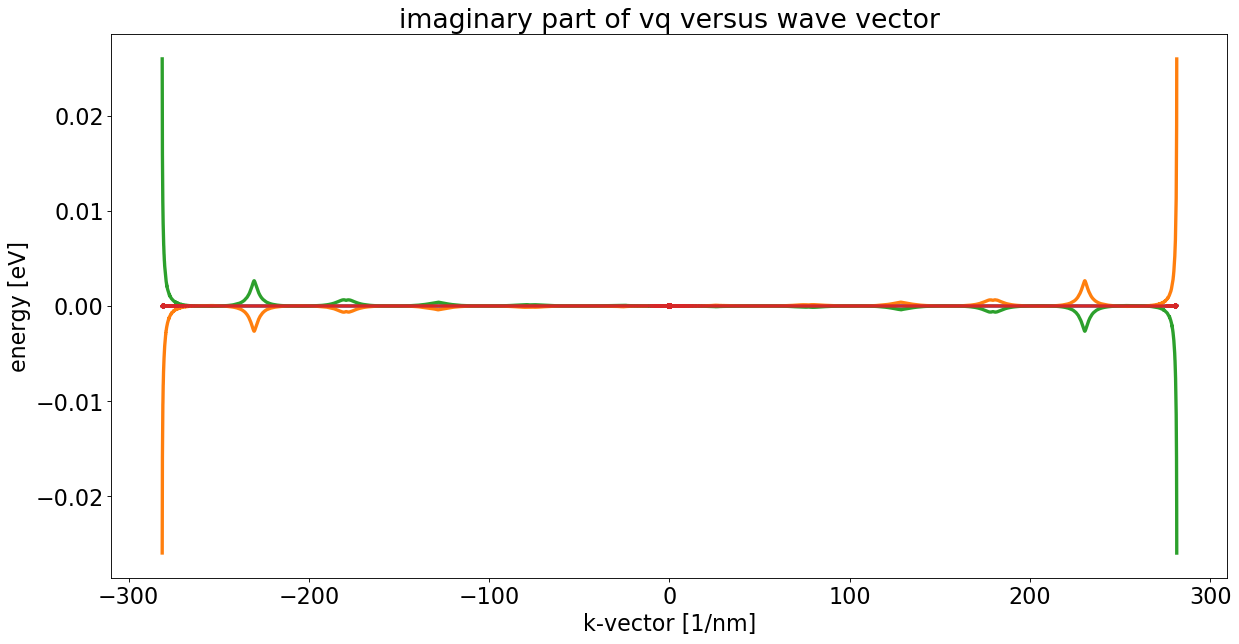

In [38]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.vq_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9
# print("q_vec dimensions")

# load and plot real part of vq
filename = os.path.join(directory,"cnt1.vq_real.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0]*dims[2],dims[1]))

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_real = np.empty(dims)
print(vq_real.shape)
for k in range(dims[2]):
    vq_real[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec,vq_real[:,j,k]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('real part of vq versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('energy [eV]', size=20)

# load and plot imaginary part of vq
filename = os.path.join(directory,"cnt1.vq_imag.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0]*dims[2],dims[1]))

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_imag = np.empty(dims)
for k in range(dims[2]):
    vq_imag[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec, vq_imag[:,j,k]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('imaginary part of vq versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('energy [eV]', size=20)
        

# Plot polarization: $\Pi(q)$

dimensions are [18199, 1]


Text(0,0.5,'Polarization[1/Jouls]')

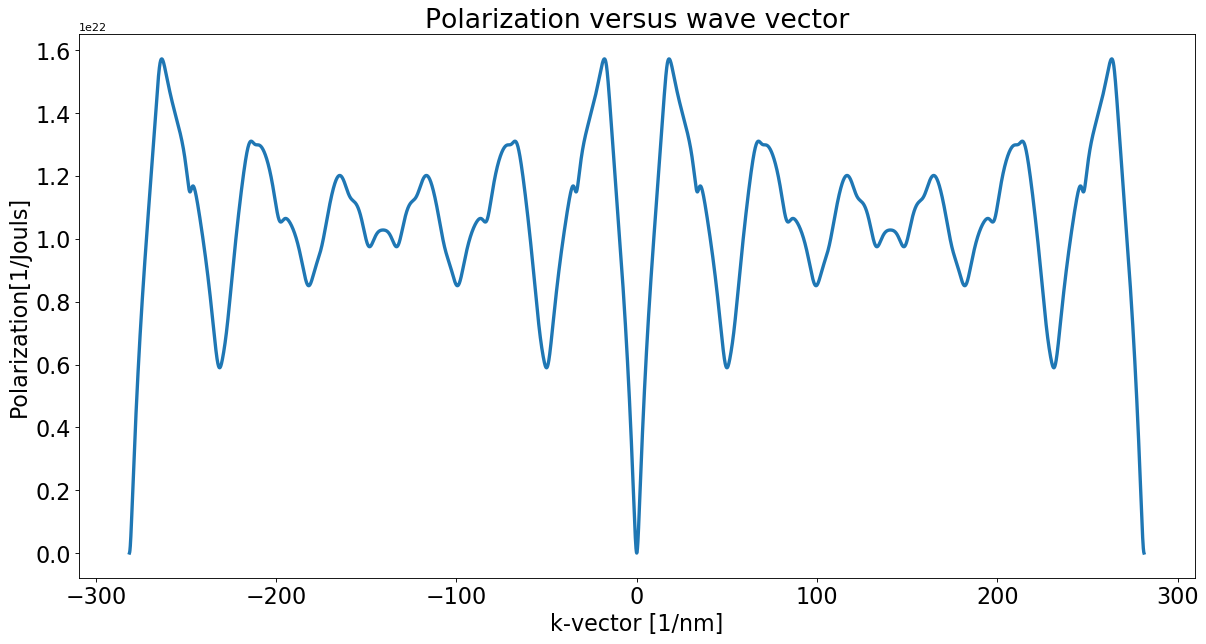

In [39]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.PI_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9

# load and plot polarization vq
filename = os.path.join(directory,"cnt1.PI.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

PI = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,PI[:,i], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Polarization versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Polarization[1/Jouls]', size=20)

# Calculate and plot dielectric function $\epsilon(q)$
Use the data loaded from two previous sections

Text(0,0.5,'dielectric function')

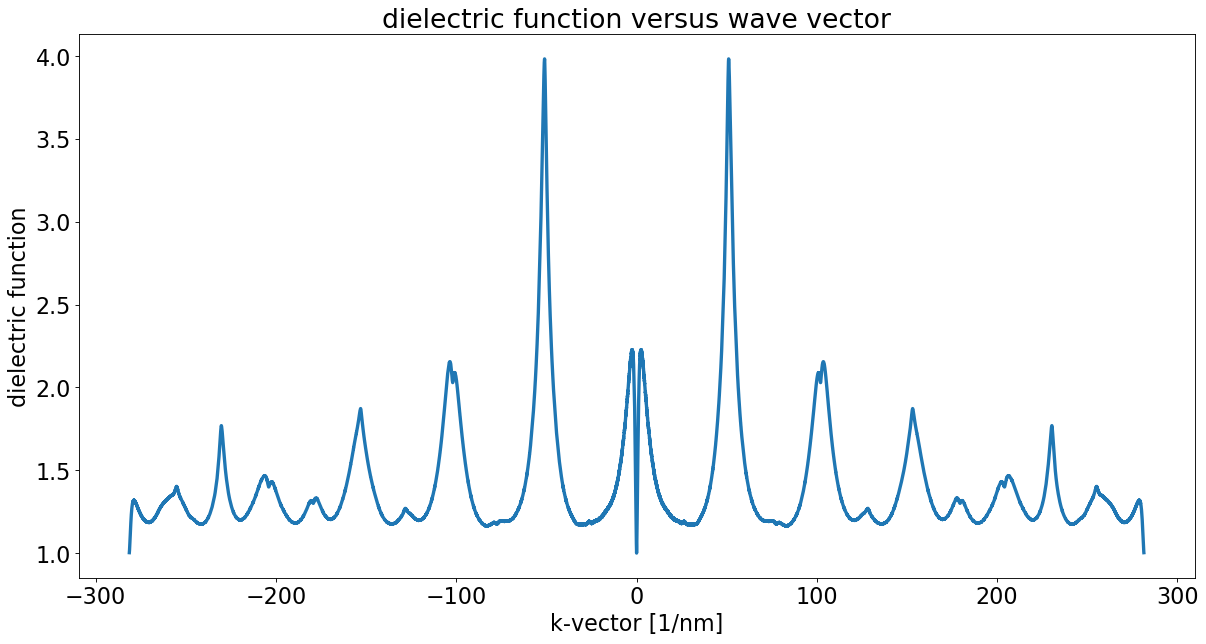

In [40]:
vq_mean = np.mean(vq_real,axis=2)
eps = 1+np.multiply(vq_mean,PI)

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,eps, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('dielectric function versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('dielectric function', size=20)

# Load and plot dielectric function $\epsilon(q)$
Load data from what was calculated by `cpp` code

dimensions are [18199, 1]


Text(0,0.5,'Dielectric function')

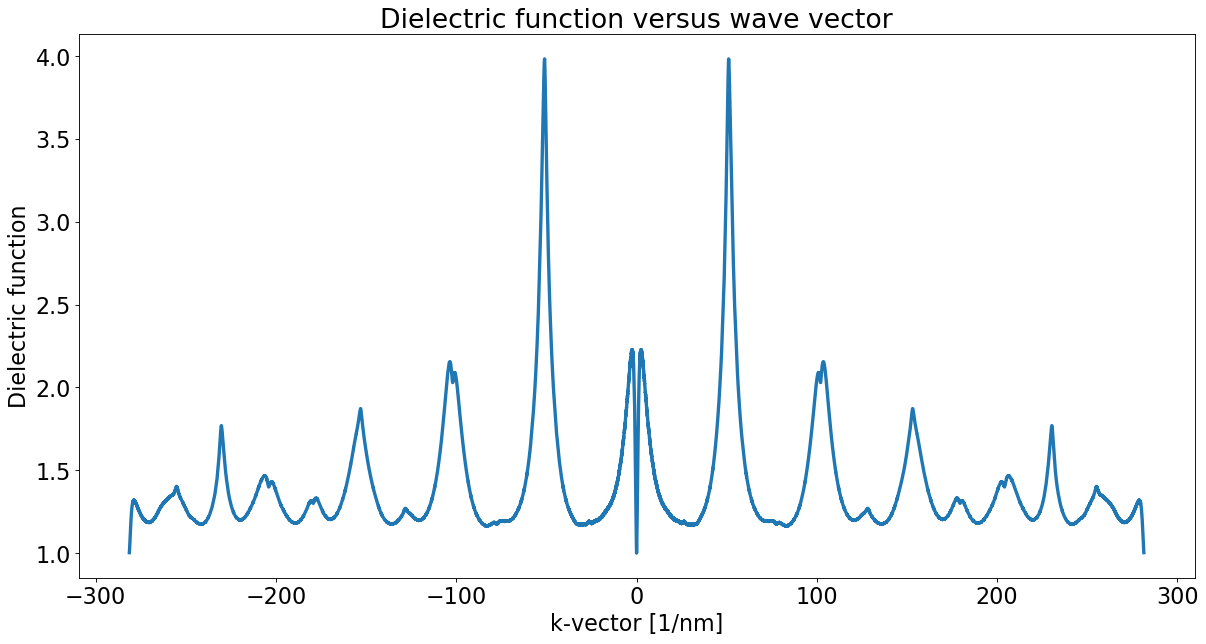

In [41]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.eps_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9

# load and plot dielectric function
filename = os.path.join(directory,"cnt1.eps.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

eps = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,eps[:,i], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Dielectric function versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Dielectric function', size=20)

# Load and plot exciton energy dispersion:
## Both singlet and triplet excitons

dimensions are [324, 162]
dimensions are [324, 162]
dimensions are [324, 162]


Text(0,0.5,'Energy [eV]')

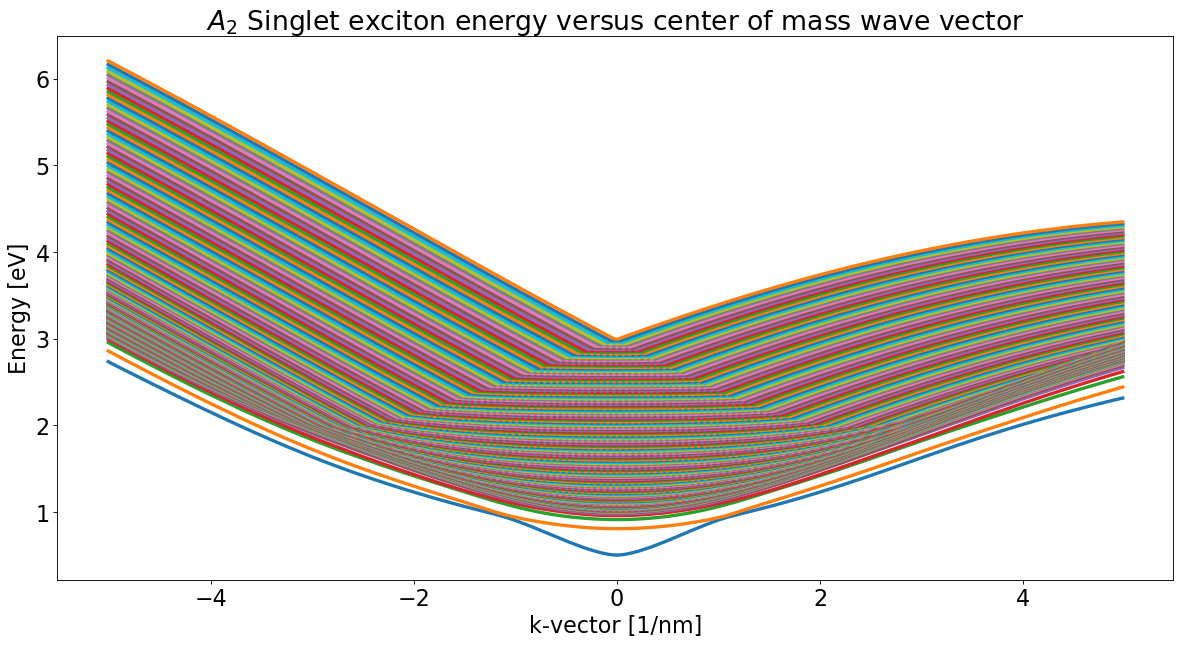

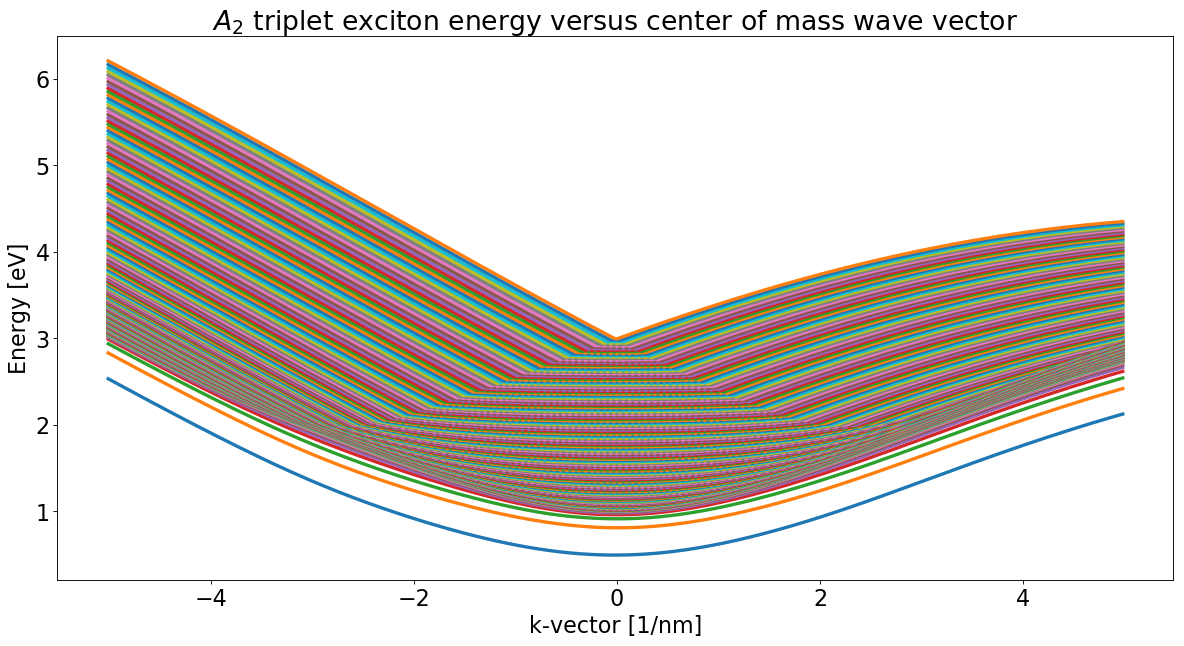

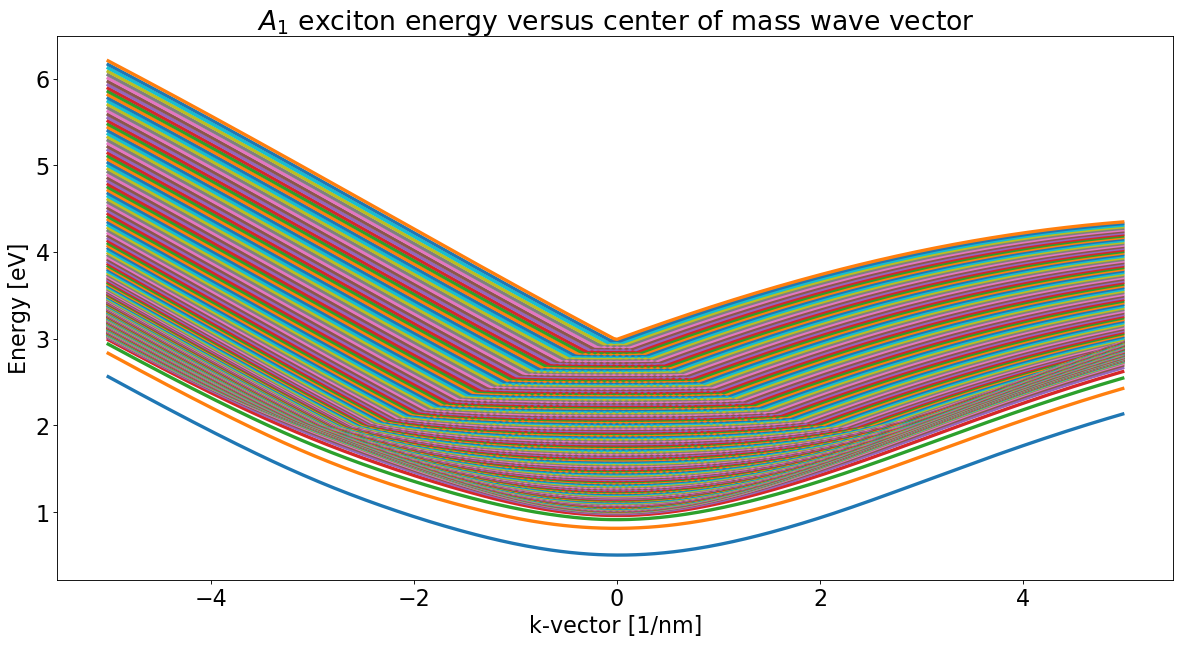

In [4]:
directory = "/Users/amirhossein/research/exciton_energy"

######################################
# load q_vector
######################################
filename = os.path.join(directory,"cnt1.exciton_k_cm_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
k_cm_vec = np.empty(dims)
k_cm_vec = data/1e9

######################################
# load and plot A2 singlet exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A2_singlet.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A2_singlet = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A2_singlet[:,i]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('$A_2$ Singlet exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
# plt.xlim([-4,4])
# plt.ylim([0.6,3])

######################################
# load and plot A2 triplet exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A2_triplet.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A2_triplet = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A2_triplet[:,i]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('$A_2$ triplet exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
# plt.xlim([-4,4])
# plt.ylim([ymin,ymin+1])

######################################
# load and plot A1 exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A1.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A1 = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A1[:,i]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('$A_1$ exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
# plt.xlim([-4,4])
# plt.ylim([0.5,2.5])

# Plot a Lorenzian function
$$L(x) = \frac{1}{\pi} \times \frac{\epsilon}{x^2+\epsilon^2}$$
here $\epsilon$ is the broadening factor.

In the limit of $\epsilon \rightarrow 0$ we have
$$\lim_{\epsilon \rightarrow 0} L(x) = \delta(x)$$

Text(0,0.5,'1/energy [1/eV]')

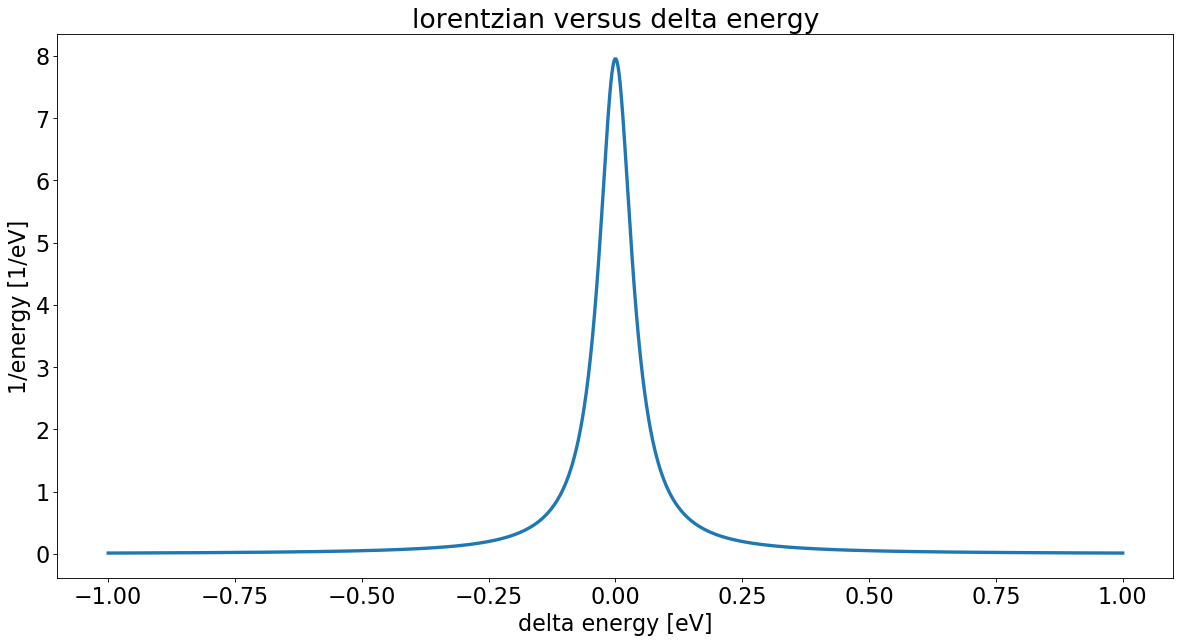

In [44]:
def lorentzian(energy):
    broadening = 40e-3*eV
    return broadening/(np.power(energy,2)+np.power(broadening,2))/np.pi

energy = np.linspace(-1,1,1000)
energy = energy*eV
lorenz = lorentzian(energy)

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(energy/eV,lorenz*eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('lorentzian versus delta energy', size=24)
plt.xlabel('delta energy [eV]', size=20)
plt.ylabel('1/energy [1/eV]', size=20)

# Plot $Q(K_i,K_f)$ matrix element

In [2]:
directory = "/Users/amirhossein/research/exciton_transfer"

######################################
# load initial ik_cm values
######################################
filename = os.path.join(directory,"matrix_element_q.init_ik_cm.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
init_ik_cm = data


######################################
# load final ik_cm values
######################################
filename = os.path.join(directory,"matrix_element_q.init_ik_cm.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
final_ik_cm = data

######################################
# load imaginary part of Q
######################################
filename = os.path.join(directory,"matrix_element_q.imag.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
Q_matrix_image = data

######################################
# load real part of Q
######################################
filename = os.path.join(directory,"matrix_element_q.real.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
Q_matrix_real = data

######################################
# make complex matrix Q
######################################
Q_matrix = Q_matrix_real + 1j*Q_matrix_image
extent = [np.amin(final_ik_cm), np.amax(final_ik_cm), np.amin(init_ik_cm), np.amax(init_ik_cm)]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
im1 = plt.imshow(np.abs(Q_matrix), cmap=plt.cm.viridis, origin='lower',\
                 interpolation='nearest', extent=extent)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('$Q(iK_1,iK_2)$ matrix element', size=24)
plt.xlabel('$iK_2$', size=20)
plt.ylabel('$iK_1$', size=20)
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amirhossein/research/exciton_transfer/matrix_element_q.init_ik_cm.dat'

# Plot $J(K_i,K_f)$ matrix element

In [3]:
directory = "/Users/amirhossein/research/exciton_transfer"

######################################
# load initial ik_cm values
######################################
filename = os.path.join(directory,"matrix_element_j.init_ik_cm.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
init_ik_cm = data


######################################
# load final ik_cm values
######################################
filename = os.path.join(directory,"matrix_element_j.init_ik_cm.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
final_ik_cm = data

######################################
# load imaginary part of Q
######################################
filename = os.path.join(directory,"matrix_element_j.imag.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
J_matrix_image = data

######################################
# load real part of Q
######################################
filename = os.path.join(directory,"matrix_element_j.real.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,tuple(dims))
J_matrix_real = data

######################################
# make complex matrix Q
######################################
J_matrix = J_matrix_real + 1j*J_matrix_image
extent = [np.amin(final_ik_cm), np.amax(final_ik_cm), np.amin(init_ik_cm), np.amax(init_ik_cm)]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
# im1 = plt.imshow(np.log(np.abs(J_matrix)), cmap=plt.cm.viridis, origin='lower',\
#                  interpolation='hanning', extent=extent)
im1 = plt.imshow(np.abs(J_matrix), cmap=plt.cm.viridis, origin='lower',\
                 interpolation='hanning', extent=extent)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('$J(iK_1,iK_2)$ matrix element', size=24)
plt.xlabel('$iK_2$', size=20)
plt.ylabel('$iK_1$', size=20)
plt.colorbar()

# print(np.abs(J_matrix))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amirhossein/research/exciton_transfer/matrix_element_j.init_ik_cm.dat'

In [32]:
np.sqrt(10201)

101.0